## Home Run with Air Resistance

**Execute the initialization cell.** All these variables will then be available to the rest of the code.

In [2]:
# Initial speed of hit ball in meters per second
initial_speed = 60

# Initial angle of hit ball in degrees from horizontal
initial_angle = 30

# Simulation time step in seconds
delta_t = 0.1

# Distance to fence in meters
distance_to_fence = 100

# density_of_air * area_of_ball * drag_coefficient / (2 * mass_of_ball)
# just call the whole combo air_constant_over_m
air_constant_over_m = 0.012

# Below is the way g is usually defined -- the amount is 9.81 m/s^2 downwards.
# People don't put a minus sign in g -- that's a convention, and we are not changing it.
# When you use this constant, you have to remember to put the minus sign in front of it
# to take care of the fact that gravity pulls in the -y direction.
g = 9.81

# Simulation time step in seconds
delta_t = 0.1

from math import sin, cos, atan2, sqrt, pi

# The following import statement makes the plotting library available to us. There is also a
# statement to work around a known Jupyter bug: https://github.com/jupyter/notebook/issues/3670
%matplotlib inline
import matplotlib.pyplot as plt

## Function to get Components of a Vector

In [5]:
# computes horizontal and vertical components of a vector and returns them as a tuple
def vector_components(length, angle_from_horizontal):
    # convert angle from degrees to radians
    angle = angle_from_horizontal * pi / 180.0
    # this line is good
    horizontal_component = length * cos(angle)
    # fix the next line -- DONE
    vertical_component = length * sin(angle)
    # return both components as a tuple
    return horizontal_component, vertical_component

initial_horizontal_velocity, initial_vertical_velocity = vector_components(initial_speed, initial_angle)
initial_horizontal_velocity, initial_vertical_velocity

(51.96152422706632, 29.999999999999996)

## Functions to get Angle and Speed from Components

In [3]:
# sometimes we need to go from components to angle and speed -- instead of from angle and speed to components

# get angle from components using atan2 version of arctangent function
def angle_from_velocity(horizontal_velocity, vertical_velocity):
    # use the arctangent function
    angle = atan2(vertical_velocity, horizontal_velocity)  
    # we are working in degrees -- convert radians to degrees
    angle_in_degrees = angle * 180.0 / pi
    # return the result
    return angle_in_degrees

# get speed from components using Pythagorean theorem
def speed_from_velocity(horizontal_velocity, vertical_velocity):
    # pythagorean theorem
    hypotenuse = sqrt(horizontal_velocity**2 + vertical_velocity**2)
    # return the result
    return hypotenuse

## Function to get Acceleration Components as a Tuple

In [12]:
# The function will return a tuple consisting of the horizontal acceleration and the vertical acceleration.
def acceleration_with_drag(horizontal_velocity, vertical_velocity):
    angle = angle_from_velocity(horizontal_velocity, vertical_velocity)
    speed = speed_from_velocity(horizontal_velocity, vertical_velocity)
    strength_of_drag = air_constant_over_m * speed**2
    direction_of_drag = angle + 180
    horizontal_component, vertical_component = vector_components(strength_of_drag, direction_of_drag)
    return horizontal_component, vertical_component - g


## The While Loop That Does the Work

In [8]:
# Initialize the x and y velocities
x_velocities = [initial_horizontal_velocity]
y_velocities = [initial_vertical_velocity]
# Initialize the x and y positions
x_positions = [0.0]
y_positions = [1.0]
# Initialize the times
times = [0.0]

# We want to go until the ball is over the fence. If the ball doesn't make it to the fence after 100 steps, stop the program anyway.

while x_positions[-1] < distance_to_fence and len(times) < 100:
    #
    # get all the before values
    #
    # velocities
    before_x_velocity = x_velocities[-1]
    before_y_velocity = y_velocities[-1]
    # positions
    before_x_position = x_positions[-1]
    before_y_position = y_positions[-1]
    # time
    before_time = times[-1]
    #
    # use the new acceleration_with_drag function to get the accelerations
    #
    x_acceleration, y_acceleration = acceleration_with_drag(before_x_velocity, before_y_velocity)
    #
    # bog-standard Euler update code -- in two dimensions
    #
    # update the x and y velocities
    after_x_velocity = before_x_velocity + delta_t * x_acceleration
    after_y_velocity = before_y_velocity + delta_t * y_acceleration
    # update the x and y positions
    after_x_position = before_x_position + delta_t * before_x_velocity
    after_y_position = before_y_position + delta_t * before_y_velocity
    # update time
    after_time = before_time + delta_t
    #
    # append all the after values to their lists
    #
    x_velocities.append(after_x_velocity)
    y_velocities.append(after_y_velocity)
    x_positions.append(after_x_position)
    y_positions.append(after_y_position)
    times.append(after_time)


## Graphs

There are various interesting graphs we can make out of the x and y positions, the x and y velocities, and the times.

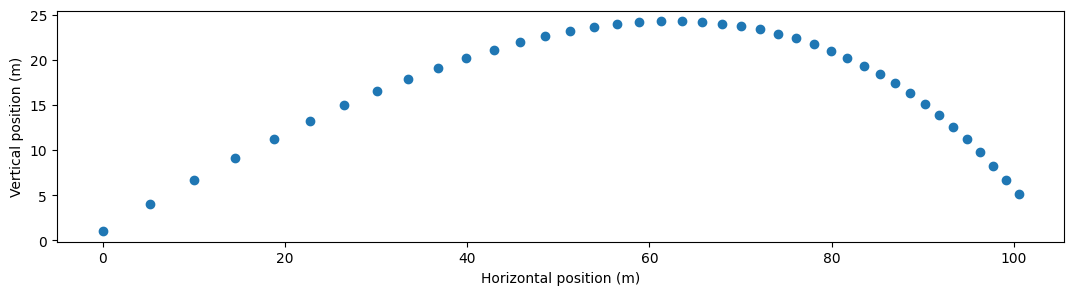

In [9]:
plt.figure(figsize=(13, 3))

plt.scatter(x_positions, y_positions)

plt.xlabel("Horizontal position (m)")
plt.ylabel("Vertical position (m)")

plt.show()

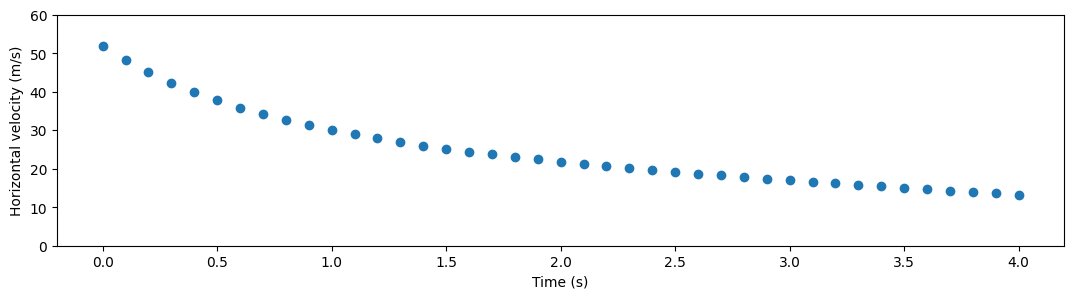

In [10]:
plt.figure(figsize=(13, 3))

plt.scatter(times, x_velocities)

plt.xlabel("Time (s)")
plt.ylabel("Horizontal velocity (m/s)")
plt.ylim(0, 60)

plt.show()

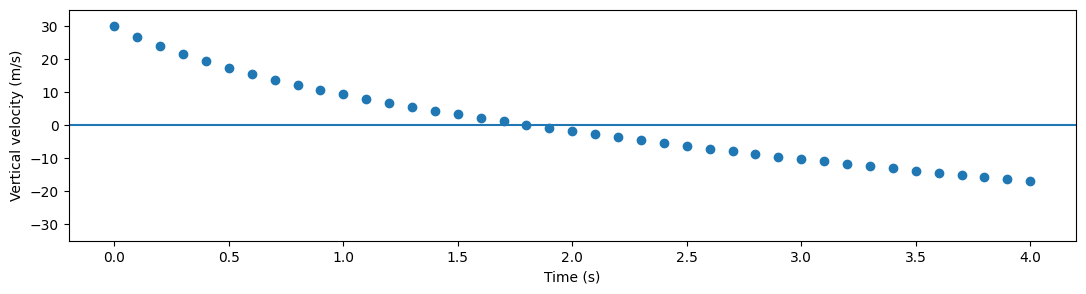

In [11]:
plt.figure(figsize=(13, 3))

plt.scatter(times, y_velocities)

plt.xlabel("Time (s)")
plt.ylabel("Vertical velocity (m/s)")
plt.ylim(-35, 35)
plt.axhline()

plt.show()